## Import Data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
data = pd.read_csv('DukuhKupang.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB


In [4]:
data = data.drop(columns = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)','Temperature (Fahrenheit)'])


In [5]:
data.isnull().sum()

PM2.5 (ug/m3)            0
PM10 (ug/m3)             0
CO2 (ppm)                0
Temperature (Celsius)    0
Humidity (%)             0
dtype: int64

In [6]:
data.isna().sum()

PM2.5 (ug/m3)            0
PM10 (ug/m3)             0
CO2 (ppm)                0
Temperature (Celsius)    0
Humidity (%)             0
dtype: int64

In [7]:
data.duplicated().sum()

1227

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data.describe(

)

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
count,38816.000000,38816.000000,38816.000000,38816.000000,38816.000000
mean,39.754854,76.841019,430.722795,28.753156,79.632471
std,33.911649,67.678937,21.410946,3.631565,12.615942
min,3.000000,3.000000,390.000000,23.800000,41.000000
25%,19.000000,36.000000,416.000000,26.000000,72.000000
50%,30.000000,57.000000,426.000000,27.500000,83.000000
75%,49.000000,92.000000,440.000000,30.700000,90.000000
max,1798.800000,2000.000000,628.000000,41.500000,97.000000


In [10]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 5015


In [11]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 5015 potential outliers.
Removing 2056 potential outliers.
Removing 984 potential outliers.
Removing 430 potential outliers.
Removing 228 potential outliers.
Removing 134 potential outliers.
Removing 169 potential outliers.
Removing 276 potential outliers.
Removing 78 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 29446


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
25,16.0,35,427,37.6,49
26,12.0,30,426,37.6,48
27,16.0,35,422,37.5,50
28,12.0,18,421,37.3,49
29,11.0,13,424,37.1,50


In [12]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 25 to 40042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PM2.5 (ug/m3)          29446 non-null  float64
 1   PM10 (ug/m3)           29446 non-null  int64  
 2   CO2 (ppm)              29446 non-null  int64  
 3   Temperature (Celsius)  29446 non-null  float64
 4   Humidity (%)           29446 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


<Axes: >

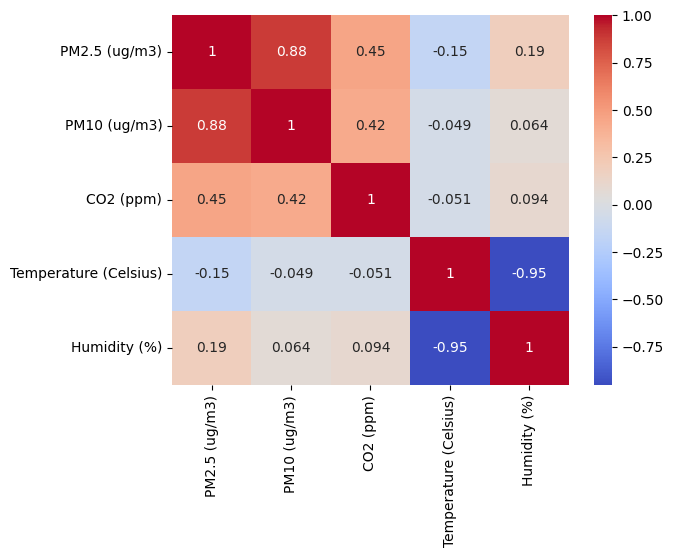

In [13]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [14]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import numpy as np

# Parameter awal (bisa di-tune)
dbscan = DBSCAN(eps=0.6000000000000001, min_samples=9)
train_clusters = dbscan.fit_predict(X_train_scaled)

# Jumlah cluster dan noise
n_clusters = len(set(train_clusters)) - (1 if -1 in train_clusters else 0)
n_noise = list(train_clusters).count(-1)

print(f"✅ Number of clusters found: {n_clusters}")
print(f"⚠️ Number of noise points: {n_noise}")
print(f"📊 Cluster labels: {np.unique(train_clusters)}")

✅ Number of clusters found: 2
⚠️ Number of noise points: 197
📊 Cluster labels: [-1  0  1]


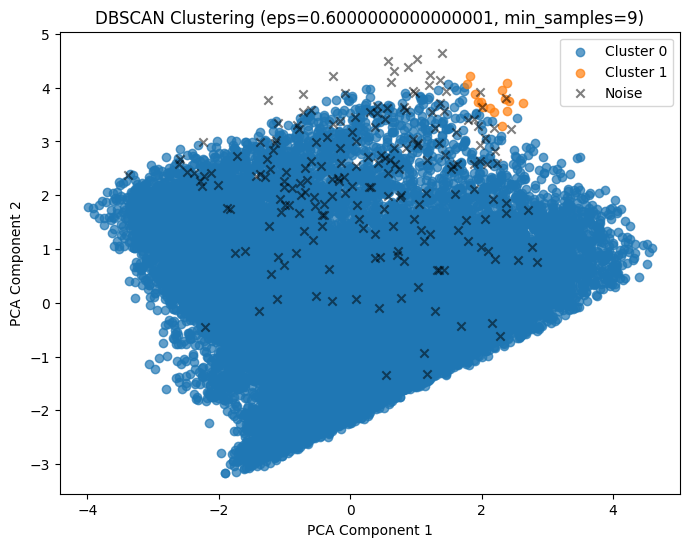

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Kurangi dimensi jadi 2 biar bisa divisualisasikan
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Plot hasil cluster
plt.figure(figsize=(8,6))
unique_labels = set(train_clusters)

for label in unique_labels:
    if label == -1:
        # Noise = warna hitam
        color = "k"
        plt.scatter(
            X_reduced[train_clusters == label, 0],
            X_reduced[train_clusters == label, 1],
            c=color, label="Noise", alpha=0.5, marker="x"
        )
    else:
        plt.scatter(
            X_reduced[train_clusters == label, 0],
            X_reduced[train_clusters == label, 1],
            label=f"Cluster {label}", alpha=0.7
        )

plt.title(f"DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

eps_values = np.arange(0.2, 2.0, 0.2)
min_samples_values = range(3, 10)

best_config = None
best_score = -1  # untuk silhouette (lebih tinggi lebih baik)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train_scaled)
        
        # Jika semua noise atau hanya 1 cluster, skip
        if len(set(labels)) <= 1 or len(set(labels)) == 2 and -1 in set(labels):
            continue
        
        try:
            sil_score = silhouette_score(X_train_scaled, labels)
            dbi_score = davies_bouldin_score(X_train_scaled, labels)
            
            print(f"eps={eps}, min_samples={min_samples} "
                  f"=> silhouette={sil_score:.3f}, DBI={dbi_score:.3f}")
            
            # pilih berdasarkan silhouette
            if sil_score > best_score:
                best_score = sil_score
                best_config = (eps, min_samples, sil_score, dbi_score)
        
        except:
            continue

print("\n🔥 Best Config:")
print(f"eps={best_config[0]}, min_samples={best_config[1]}, "
      f"silhouette={best_config[2]:.3f}, DBI={best_config[3]:.3f}")


eps=0.2, min_samples=3 => silhouette=-0.574, DBI=1.492
eps=0.2, min_samples=4 => silhouette=-0.614, DBI=1.507
eps=0.2, min_samples=5 => silhouette=-0.635, DBI=1.566
eps=0.2, min_samples=6 => silhouette=-0.619, DBI=1.718
eps=0.2, min_samples=7 => silhouette=-0.613, DBI=1.410
eps=0.2, min_samples=8 => silhouette=-0.578, DBI=1.407
eps=0.2, min_samples=9 => silhouette=-0.519, DBI=1.318
eps=0.4, min_samples=3 => silhouette=-0.340, DBI=1.375
eps=0.4, min_samples=4 => silhouette=-0.400, DBI=1.329
eps=0.4, min_samples=5 => silhouette=-0.316, DBI=1.372
eps=0.4, min_samples=6 => silhouette=-0.435, DBI=1.381
eps=0.4, min_samples=7 => silhouette=-0.229, DBI=1.407
eps=0.4, min_samples=8 => silhouette=-0.128, DBI=1.646
eps=0.4, min_samples=9 => silhouette=-0.090, DBI=1.675
eps=0.6000000000000001, min_samples=3 => silhouette=0.166, DBI=1.580
eps=0.6000000000000001, min_samples=4 => silhouette=0.125, DBI=1.615
eps=0.6000000000000001, min_samples=9 => silhouette=0.223, DBI=1.721

🔥 Best Config:
eps=0.6

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.22260500001393907
Davies-Bouldin Index: 1.7212721500029777
